In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error


In [200]:
data = load_boston()

boston_x = pd.DataFrame(data.data, columns=data.feature_names)
boston_y = pd.DataFrame(data.target, columns=['MEDV'])
boston = pd.concat([boston_x, boston_y], axis=1)

C:\Users\uzi16\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [201]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [202]:
data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [203]:
boston_y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [204]:
boston_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


nie mamy żadnych brakujących danych!
wszystkie dane są przedstawione liczbami

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

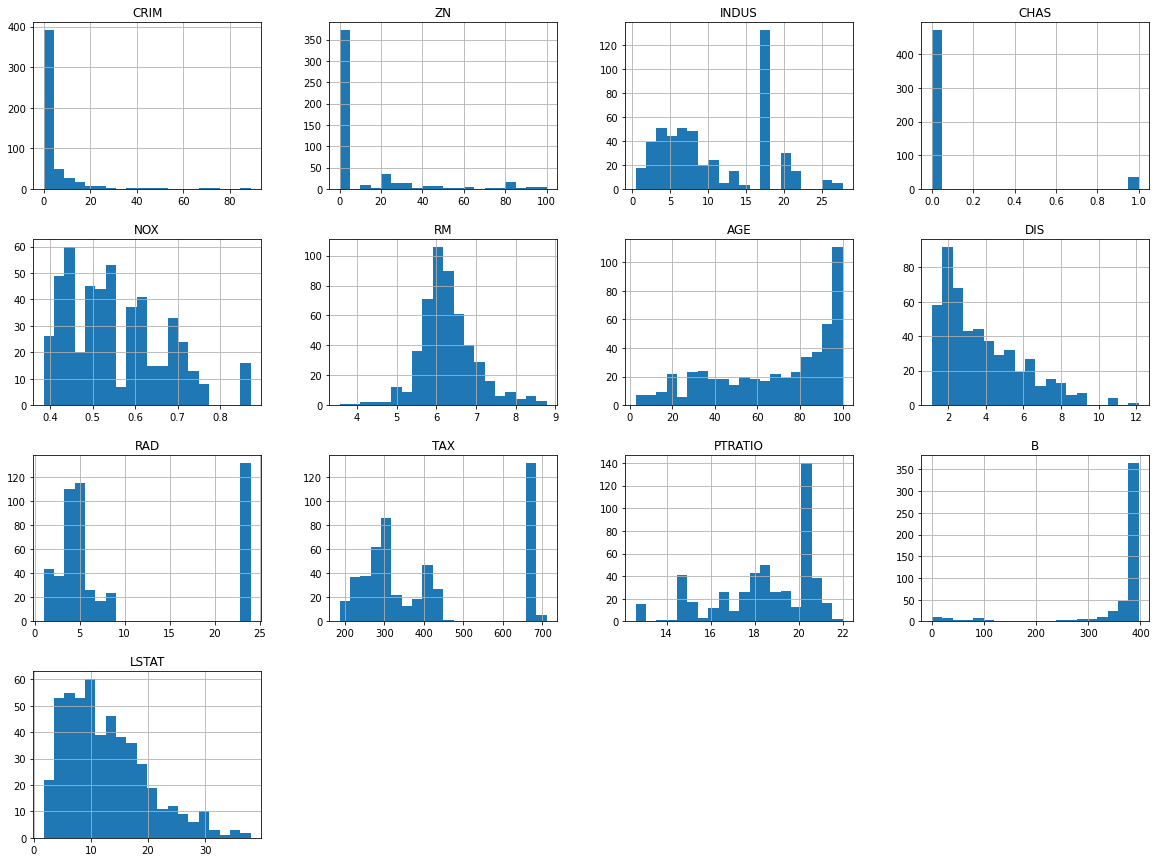

In [205]:
boston_x.hist(bins=20, figsize=(20, 15))

In [206]:
corr_matrix = boston.corr().round(2)
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.00
RM         0.70
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
AGE       -0.38
RAD       -0.38
CRIM      -0.39
NOX       -0.43
TAX       -0.47
INDUS     -0.48
PTRATIO   -0.51
LSTAT     -0.74
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='CRIM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='ZN', ylabel='CRIM'>,
        <AxesSubplot:xlabel='INDUS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='CHAS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='NOX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='AGE', ylabel='CRIM'>,
        <AxesSubplot:xlabel='DIS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RAD', ylabel='CRIM'>,
        <AxesSubplot:xlabel='TAX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='CRIM'>,
        <AxesSubplot:xlabel='B', ylabel='CRIM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='CRIM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='CRIM'>],
       [<AxesSubplot:xlabel='CRIM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='INDUS', ylabel='ZN'>,
        <AxesSubplot:xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot:xlabel='NOX', ylabel='ZN'>,
        <AxesSubplot:xlabel='R

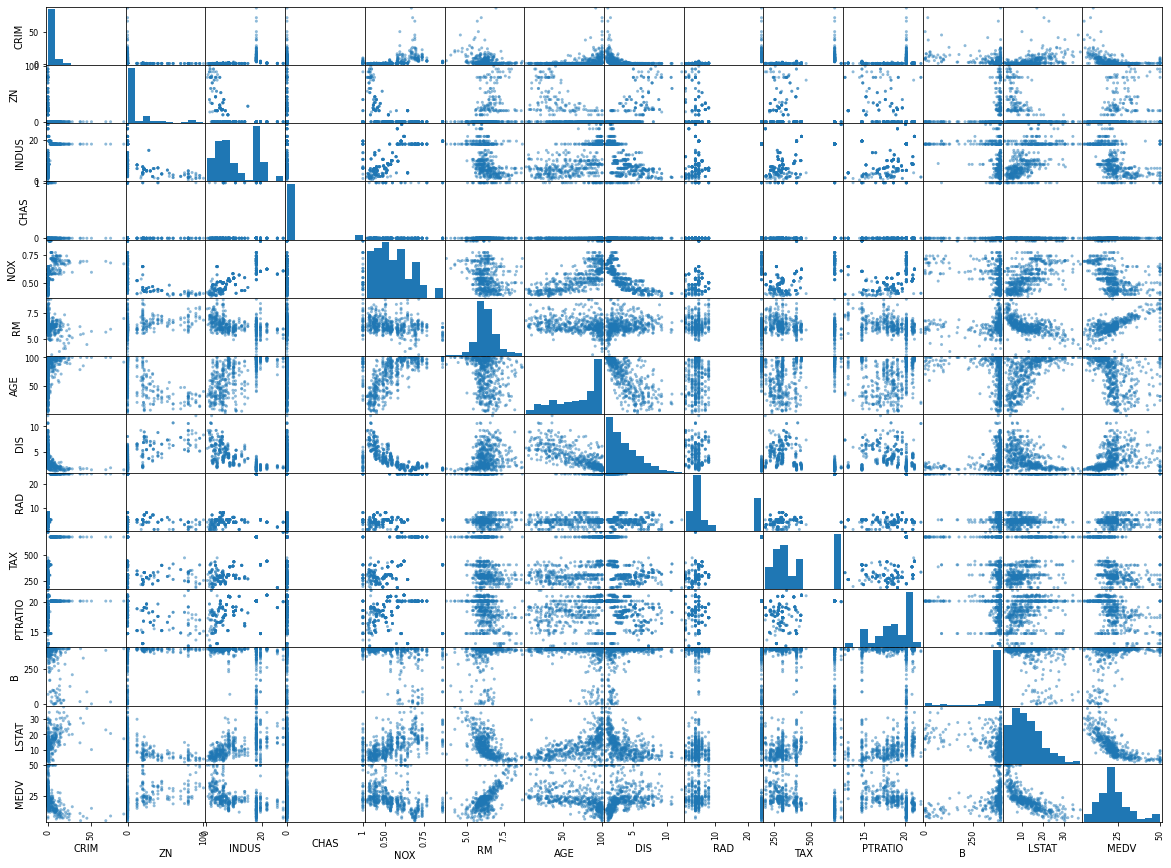

In [207]:
from pandas.plotting import scatter_matrix
scatter_matrix(boston, figsize = (20, 15))

In [208]:
features = boston_x.drop(["CHAS", "AGE", "DIS", "RAD", "ZN", "CRIM", "B"], axis=1)

In [209]:
features.describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.136779,0.554695,6.284634,408.237154,18.455534,12.653063
std,6.860353,0.115878,0.702617,168.537116,2.164946,7.141062
min,0.460000,0.385000,3.561000,187.000000,12.600000,1.730000
25%,5.190000,0.449000,5.885500,279.000000,17.400000,6.950000
50%,9.690000,0.538000,6.208500,330.000000,19.050000,11.360000
75%,18.100000,0.624000,6.623500,666.000000,20.200000,16.955000
max,27.740000,0.871000,8.780000,711.000000,22.000000,37.970000


In [210]:
reg = linear_model.LinearRegression()


In [228]:
X_train, X_test, y_train, y_test = train_test_split(boston_x, boston_y, test_size=0.25, random_state=42)

In [229]:
y_train.head()

,MEDV
182,37.9
155,15.6
280,45.4
126,15.7
329,22.6


In [230]:
reg.fit(X_train, y_train)

LinearRegression()

In [231]:
y_pred = reg.predict(X_test)
print(y_pred[0:10])


[[28.83885359]
 [36.00783288]
 [15.08324755]
 [25.23090886]
 [18.87864064]
 [23.21398327]
 [17.5931124 ]
 [14.30508093]
 [23.05438985]
 [20.62008346]]


In [232]:
print(y_test[0:10])

     MEDV
173  23.6
274  32.4
491  13.6
72   22.8
452  16.1
76   20.0
316  17.8
140  14.0
471  19.6
500  16.8


In [233]:
print(mean_squared_error(y_test, y_pred))

22.098694827097958


In [234]:
X_train, X_test, y_train, y_test = train_test_split(features, boston_y, test_size=0.25, random_state=42)

In [235]:
reg.fit(X_train, y_train)

LinearRegression()

In [236]:
y_pred2 = reg.predict(X_test)
print(y_pred2[0:10])

[[26.45069011]
 [31.07751674]
 [17.13082731]
 [25.60267308]
 [17.80408147]
 [23.21372325]
 [17.78447475]
 [14.12004176]
 [20.47109796]
 [19.45020211]]


In [237]:
print(y_test[0:10])

     MEDV
173  23.6
274  32.4
491  13.6
72   22.8
452  16.1
76   20.0
316  17.8
140  14.0
471  19.6
500  16.8


In [238]:
print(mean_squared_error(y_test, y_pred2))

26.04350729792079


Okazuje się, że model ze wszystkimi danymi, nawet tymi o mniejszej korelacji jest dokładniejszy niż ten, z którego wycięte zostały mniej znaczące kolumny